In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def display_experiment(experiment):
    display(Markdown(f'## {experiment["concept"]["label"]} ({experiment["concept"]["id"]})'))
    display(Markdown(experiment["concept"]["serialization"]))
    display(Markdown("### Confusion matrix"))
    cm = pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"])
    df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
    ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_title(experiment["concept"]["label"])
    ax.set(xlabel='LLM', ylabel='KG')
    plt.show()
    df = pd.DataFrame.from_records(experiment["data"])
    df_fp = df[((df["actual"] == 'negative') & (df["predicted"] == 'positive'))][["label", "serialization", "rationale"]]
    if len(df_fp) > 0:
        df_fp_styler = df_fp.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM positive, KG negative"))
        display(df_fp_styler)
    df_fn = df[((df["actual"] == 'positive') & (df["predicted"] == 'negative'))][["label", "serialization", "rationale"]]
    if len(df_fn) > 0:
        df_fn_styler = df_fn.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown("### LLM negative, KG positive"))
        display(df_fn_styler)

In [3]:
experiments = [ experiment for experiment in json.load(open('caligraph_gpt-4_serialization_results.json', 'r')) if "confusion_matrix" in experiment ]

In [4]:
experiment_df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": f'{pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC:.1%}',
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments ]).sort_values("kappa", ascending=False)
experiment_df[["name", "kappa", "SOA9", "ACC", "FP", "FN", "POP"]]

,name,kappa,SOA9,ACC,FP,FN,POP
6,FK Sarajevo player,0.750000,Tentative,87.5%,0,5,40
1,Populated place in Luxembourg,0.700000,Tentative,85.0%,1,5,40
16,Member of the House of Representatives of Japa...,0.650000,Low,82.5%,0,7,40
13,2017 video game,0.550000,Low,77.5%,0,9,40
9,1921 film,0.550000,Low,77.5%,4,5,40
5,Newspaper in New South Wales,0.450000,Low,72.5%,1,10,40
19,Autobiography,0.400000,Low,70.0%,0,12,40
17,PlayStation VR game,0.400000,Low,70.0%,1,11,40
2,Single-camera television sitcom,0.300000,Low,65.0%,0,14,40
12,21st-century American drummer,0.200000,Low,60.0%,0,16,40


In [5]:
experiment_df.describe()

,kappa,FP,FN,POP
count,20.000000,20.00000,20.000000,20.000000
mean,0.233557,2.10000,13.050000,39.450000
std,0.320240,3.62593,5.020746,2.459675
min,-0.450000,0.00000,5.000000,29.000000
25%,0.000000,0.00000,9.750000,40.000000
50%,0.200000,0.00000,14.000000,40.000000
75%,0.475000,2.50000,16.500000,40.000000
max,0.750000,13.00000,20.000000,40.000000


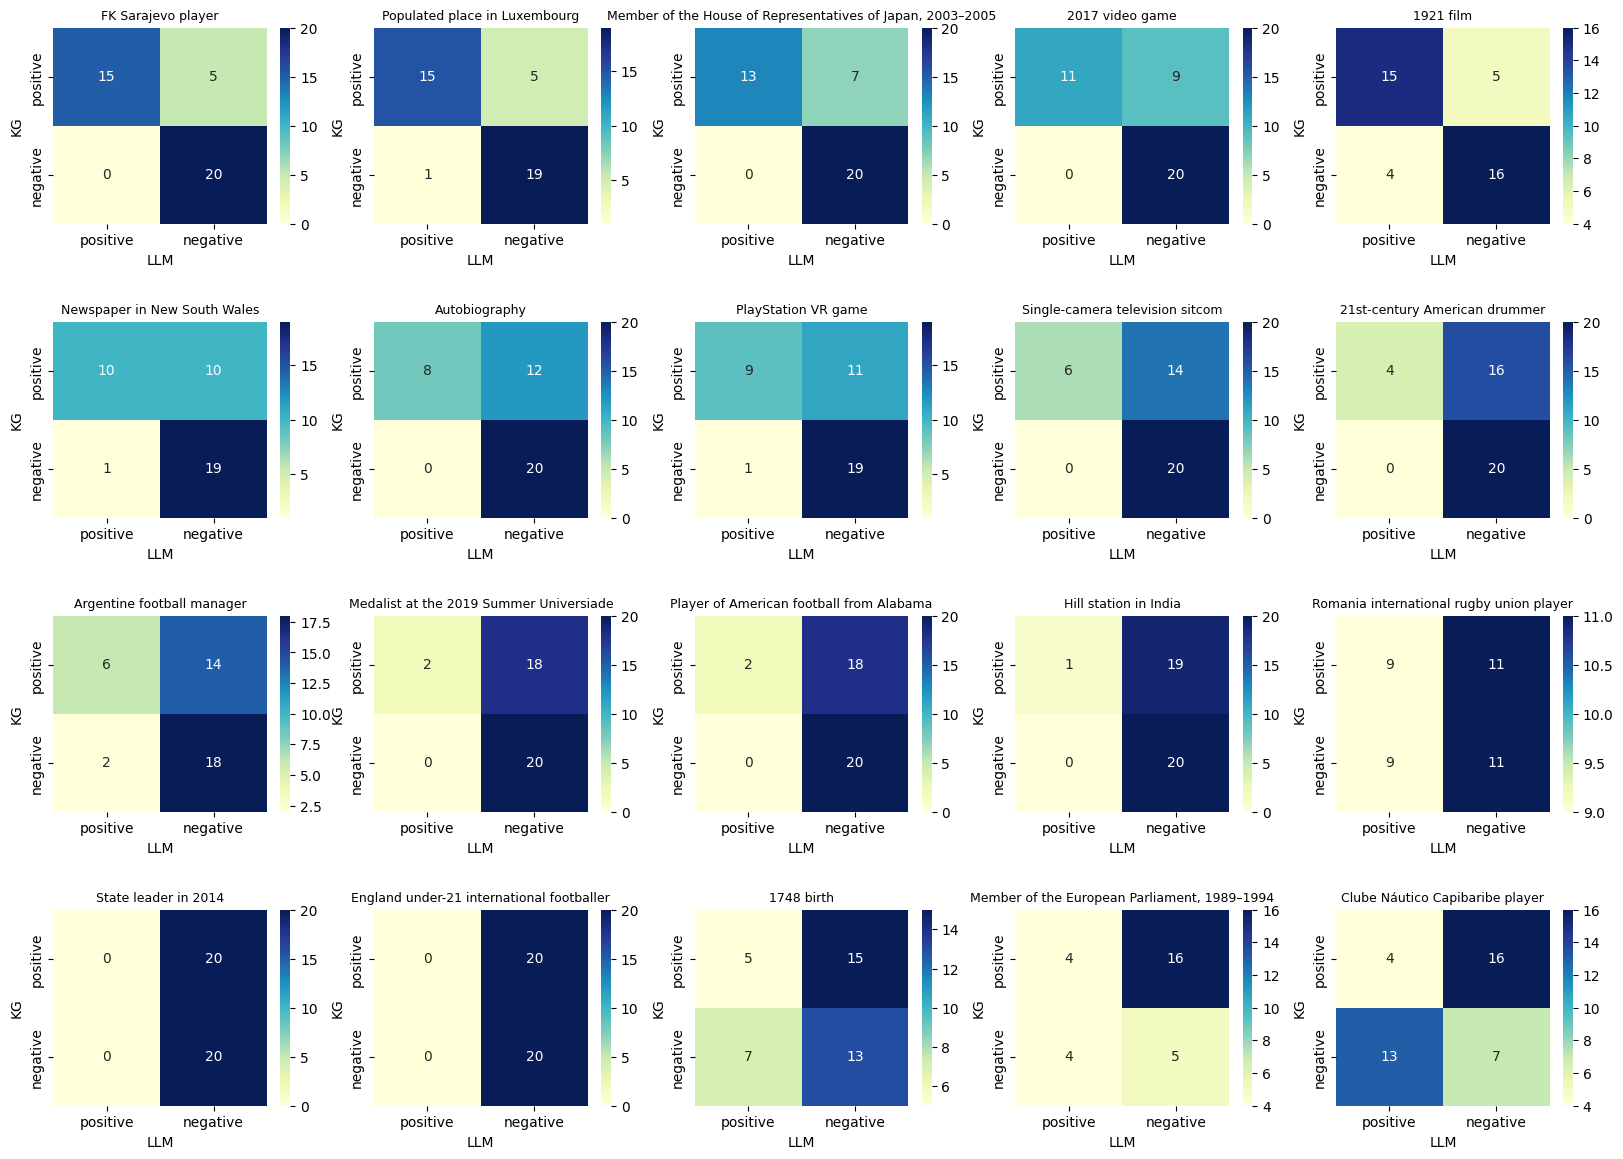

In [6]:
fig = plt.figure(figsize=(20,14))
gs = fig.add_gridspec(4, 5, hspace=0.5)
axes = gs.subplots()
cms = [ (experiment["name"], pycm.ConfusionMatrix(matrix=experiment["experiment"]["confusion_matrix"])) for experiment in experiment_df.to_dict('records')  ]
for ax, (name, cm) in zip(axes.flat, cms):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name, wrap=True, fontsize=9)
    ax.set(xlabel='LLM', ylabel='KG')
for ax in axes.flat[len(cms):]:
    ax.set_visible(False)
plt.show()

## FK Sarajevo player (http://caligraph.org/ontology/FK_Sarajevo_player)

"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/2000/01/rdf-schema#label"	"FK Sarajevo player"
"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/RestrictionHasValue_team_FK%20Sarajevo"
"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Footballer_in_Bosnia_and_Herzegovina"
"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Association_football_player_in_Bosnia_and_Herzegovina"
"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:FK_Sarajevo_players"
"http://caligraph.org/ontology/FK_Sarajevo_player"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_FK_Sarajevo_players"
"http://caligraph.org/resource/Branislav%20Arsenijevi%C4%87_(19490760)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Sead%20Jesenkovi%C4%87_(19501461)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Darko_Raca"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Franjo_Vuleta"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Ibrahim_Biogradli%C4%87"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Vule_Trivunovi%C4%87"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Sretko_Vuksanovi%C4%87"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Vuka%C5%A1in_Vi%C5%A1njevac"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Marko_Savi%C4%87_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Frank_Liivak"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Matej_Kochan"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Safet_Nadarevi%C4%87"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"
"http://caligraph.org/resource/Said_Fazlagi%C4%87"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/FK_Sarajevo_player"


### Confusion matrix

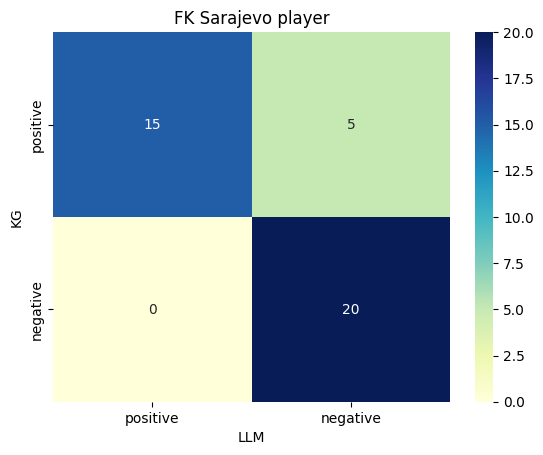

### LLM negative, KG positive

label,serialization,rationale
Franjo Vuleta,"""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1968_birth"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Yugoslav_footballer"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/FK_Sarajevo_player"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Swiss_person_of_Bosnia_and_Herzegovina_descent"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Franjo Vuleta"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Franjo_Vuleta"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Franjo Vuleta"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/birthDate"" ""1968-01-31"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/birthPlace"" ""http://caligraph.org/resource/Switzerland"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/birthPlace"" ""http://caligraph.org/resource/Socialist_Federal_Republic_of_Yugoslavia"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/birthPlace"" ""http://caligraph.org/resource/Vitez"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/birthYear"" ""1968"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/position"" ""http://caligraph.org/resource/Forward_(association_football)"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/team"" ""http://caligraph.org/resource/FK_Sarajevo"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://caligraph.org/ontology/team"" ""http://caligraph.org/resource/NK_Vitez"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Swiss_people_of_Bosnia_and_Herzegovina_descent"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:1968_births"" ""http://caligraph.org/resource/Franjo_Vuleta"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_living_people""","The definition provided does not give any information or evidence to support the assertion that Franjo Vuleta is a FK Sarajevo player. Therefore, based on the given definition, we cannot provide a rationale or argument for this assertion."
Marko Savić (footballer),"""http://caligraph.org/resource/Marko_Savi%C4%87_(footballer)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Marko_Savi%C4%87_(footballer)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1984_birth"" ""http://caligraph.org/resource/Marko_Savi%C4%87_(footballer)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Expatriate_footballer_in_Bosnia_and_Herzegovina"" ""http://caligraph.org/resource/Marko_Savi%C4%87_(footballer)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Expatriate_footballer_in_Bulgaria"" ""http://caligraph.org/resource/Marko_Savi%C4%87_(footballer)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://cali

## Populated place in Luxembourg (http://caligraph.org/ontology/Populated_place_in_Luxembourg)

"http://caligraph.org/ontology/Populated_place_in_Luxembourg"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Populated_place_in_Luxembourg"	"http://www.w3.org/2000/01/rdf-schema#label"	"Populated place in Luxembourg"
"http://caligraph.org/ontology/Populated_place_in_Luxembourg"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Populated_place_in_Europe"
"http://caligraph.org/ontology/Populated_place_in_Luxembourg"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Populated_places_in_Luxembourg"
"http://caligraph.org/ontology/Populated_place_in_Luxembourg"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_populated_places_in_Luxembourg"
"http://caligraph.org/resource/Bleesmillen_(19500076)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Hemstal_(19500778)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Pafebruch_(19764711)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Simmerfarm_(19759809)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/L%C3%B6ftgermillen_(19981928)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Cents,_Luxembourg"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Schwebach"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Kaesfurt_(17178379)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Neum%C3%BChle_(17273401)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Theinshaff_(17434441)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Kohnenhaff_(18547048)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Stoppelhaff_(18549892)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Heisbich_(18973008)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/Lauterborn_(18980569)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"
"http://caligraph.org/resource/F%C3%A9ischterbierg_(19066717)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Populated_place_in_Luxembourg"


### Confusion matrix

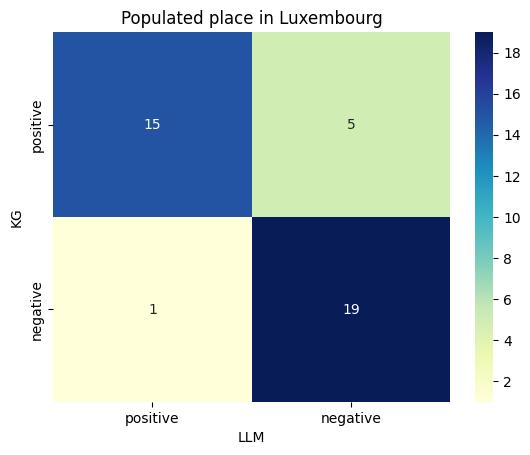

### LLM positive, KG negative

label,serialization,rationale
Skipanes,"""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Populated_place_in_the_Faroe_Islands"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Village"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Skipanes"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Skipanes"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Skipanes"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/country"" ""http://caligraph.org/resource/Danish_Realm"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/populationTotal"" ""60"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/postalCode"" ""FO-665"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/subdivision"" ""http://caligraph.org/resource/Runav%C3%ADk_Municipality"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/subdivision"" ""http://caligraph.org/resource/Faroe_Islands"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/subdivision"" ""http://caligraph.org/resource/Eysturoy"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/timeZone"" ""http://caligraph.org/resource/Summer_time_in_Europe"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/timeZone"" ""http://caligraph.org/resource/Greenwich_Mean_Time"" ""http://caligraph.org/resource/Skipanes"" ""http://caligraph.org/ontology/utcOffset"" ""+1"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Populated_places_in_the_Faroe_Islands"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Towns_of_the_Faroe_Islands"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Former_villages_by_country"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_villages"" ""http://caligraph.org/resource/Skipanes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_villages_by_country""","The entity description explicitly identifies Skipanes as a populated place in Luxembourg. Therefore, based on the provided definition, it can be argued that Skipanes is indeed a populated place in Luxembourg."


### LLM negative, KG positive

label,serialization,rationale
Hemstal,"""http://caligraph.org/resource/Hemstal_(19500778)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Hemstal_(19500778)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Populated_place_in_Luxembourg"" ""http://caligraph.org/resource/Hemstal_(19500778)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Hemstal"" ""http://caligraph.org/resource/Hemstal_(19500778)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Hemstal"" ""http://caligraph.org/resource/Hemstal_(19500778)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_populated_places_in_Luxembourg""","The definition provided does not give any specific information about Hemstal being a populated place in Luxembourg. Therefore, based on the given definition alone, it is not possible to provide a rationale or argument asserting that Hemstal is a populated place in Luxembourg."
Simmerfarm,"""http://caligraph.org/resource/Simmerfarm_(19759809)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Simmerfarm_(19759809)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Settlement"" ""http://caligraph.org/resource/Simmerfarm_(19759809)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Populated_place_in_Luxembourg"" ""http://caligraph.org/resource/Simmerfarm_(19759809)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Simmerfarm"" ""http://caligraph.org/resource/Simmerfarm_(19759809)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Simmerfarm"" ""http://caligraph.org/resource/Simmerfarm_(19759809)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Septfontaines""","The definition provided does not give any specific information about Simmerfarm being a populated place in Luxembourg. Therefore, based on the given information, it is not possible to provide a rationale or argument asserting that Simmerfarm is a populated place in Luxembourg."
Goeblange,"""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Roman_site_in_Luxembourg"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Village_in_Luxembourg"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Goeblange"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Goeblange"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Goeblange"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Gondelange"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Göblingen"" ""http://caligraph.org/resource/Goeblange"" ""http://caligraph.org/ontology/country"" ""http://caligraph.org/resource/Luxembourg"" ""http://caligraph.org/resource/Goeblange"" ""http://caligraph.org/ontology/type"" ""http://caligraph.org/resource/Protected_area"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Roman_sites_in_Luxembourg"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Villages_in_Luxembourg"" ""http://caligraph.org/resource/Goeblange"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_populated_places_in_Luxembourg""","The definition provided states that a Pop

## Member of the House of Representatives of Japan, 2003–2005 (http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005)

"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"	"http://www.w3.org/2000/01/rdf-schema#label"	"Member of the House of Representatives of Japan, 2003–2005"
"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://www.w3.org/2002/07/owl#Thing"
"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_members_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Ikuo%20Horigome_(19468425)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Kinya%20Narazaki_(19485180)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Miyoko%20Hida_(19491399)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Takashi%20Aoyama_(19467947)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Kenji_Kosaka"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Yoshir%C5%8D_Mori"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Kenji_Kobayashi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Ren_Sato"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Sadakazu_Tanigaki"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Tadahiro_Matsushita"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Yasuko_Ikenob%C5%8D"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Yuriko_Koike"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Kansei_Nakano"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Koichi_Takemasa"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Kenichi_Mizuno"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"
"http://caligraph.org/resource/Masashi_Nakano"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"


### Confusion matrix

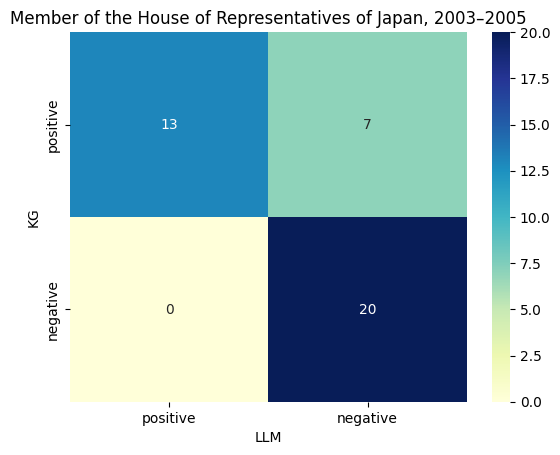

### LLM negative, KG positive

label,serialization,rationale
Miyoko Hida,"""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2nd-millennium_birth"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_associated_with_places"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Politician"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Miyoko Hida"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Miyoko Hida"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_members_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"" ""http://caligraph.org/resource/Miyoko%20Hida_(19491399)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Osaka_10th_district""","The definition provided does not give any information or evidence to support the assertion that Miyoko Hida is a Member of the House of Representatives of Japan, 2003–2005. Therefore, based on the given definition, it is not possible to provide a rationale for this assertion."
Kenji Kosaka,"""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2003%E2%80%932005"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1946_birth"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2016_death"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Death_from_cancer_in_Japan"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_House_of_Representatives_(Japan)"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/21st-century_Japanese_politician"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Keio_University_alumnus"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_Nippon_Kaigi"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_House_of_Representatives_of_Japan,_2005%E2%80%932009"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Culture_minister_of_Japan"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Education_minister_of_Japan"" ""http://caligraph.org/resource/Kenji_Kosaka"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_from_Nagano_(city)"" ""http://caligraph.org/resource/Kenji_Kos

## 2017 video game (http://caligraph.org/ontology/2017_video_game)

"http://caligraph.org/ontology/2017_video_game"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/2017_video_game"	"http://www.w3.org/2000/01/rdf-schema#label"	"2017 video game"
"http://caligraph.org/ontology/2017_video_game"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/The_art"
"http://caligraph.org/ontology/2017_video_game"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Video_game"
"http://caligraph.org/ontology/2017_video_game"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:2017_video_games"
"http://caligraph.org/resource/Our_World_is_Ended"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Atomega"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Final_Fantasy_XV"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Fortnite"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Hiveswap"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Road_Rage_(video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Buck_(video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Football_Manager_2018"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Blackwood_Crossing"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/DJMax_Respect"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Fire_Pro_Wrestling_World"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Sundered"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Creeping_Terror_(video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/DeadTruth:_The_Dark_Path_Ahead"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"
"http://caligraph.org/resource/Puzzle_Fighter_(2017_video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/2017_video_game"


### Confusion matrix

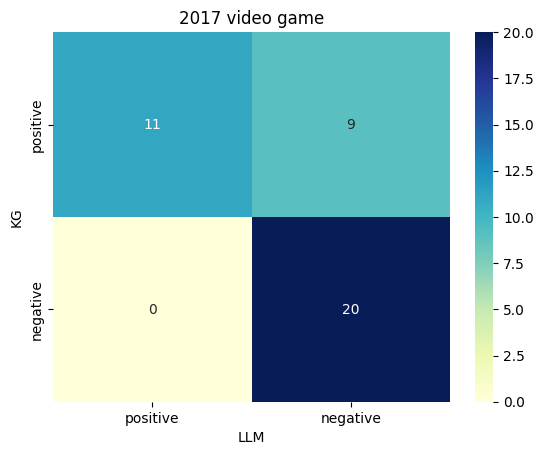

### LLM negative, KG positive

label,serialization,rationale
Our World is Ended,"""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Nintendo_Switch_game"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/PlayStation_4_games"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/PlayStation_Vita_game"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_developed_in_Japan"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Visual_novel"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Windows_game"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Xbox_One_game"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2017_video_game"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_about_parallel_universes"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_about_video_game"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_set_in_2017"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_set_in_Tokyo"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_with_alternate_endings"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Our World is Ended"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Our_World_is_Ended"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Our World is Ended"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Judgement 7 - Our World is Ended"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Oretachi no Sekai wa Owatteiru"" ""http://caligraph.org/resource/Our_World_is_Ended"" ""http://caligraph.org/ontology/computingPlatform"" ""http://caligraph.org/resource/Microsoft_Windows""","The provided definition does not contain any specific information that directly links the entity ""Our World is Ended"" to the concept of a ""2017 video game"". Therefore, based on the given information, it is not possible to provide a rationale or argument asserting that ""Our World is Ended"" is a 2017 video game."
Final Fantasy XV,"""http://caligraph.org/resource/Final_Fantasy_XV"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Fastest-selling_product"" ""http://caligraph.org/resource/Final_Fantasy_XV"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Final_Fantasy_video_game"" ""http://caligraph.org/resource/Final_Fantasy_XV"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Medium_notable_for_being_in_development_hell"" ""http://caligraph.org/

## 1921 film (http://caligraph.org/ontology/1921_film)

"http://caligraph.org/ontology/1921_film"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/1921_film"	"http://www.w3.org/2000/01/rdf-schema#label"	"1921 film"
"http://caligraph.org/ontology/1921_film"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Movie"
"http://caligraph.org/ontology/1921_film"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Upcoming_film"
"http://caligraph.org/ontology/1921_film"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:1921_films"
"http://caligraph.org/ontology/1921_film"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Lists_of_1921_films_by_country_or_language"
"http://caligraph.org/resource/Lavender_and_Old_Lace_(film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/Mated_in_the_Wilds"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/The_Home_Stretch"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/The_Whistle_(film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/A_Lowland_Cinderella"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/Alias_Ladyfingers"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/General_Post"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/Hold_Your_Horses_(film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/No_Defense_(1921_film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/School_Days_(1921_film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/The_Bell_Hop"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/The_Films_of_Princess_Fantoche"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/The_Flat_(1921_film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"
"http://caligraph.org/resource/The_Golden_Snare"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1921_film"


### Confusion matrix

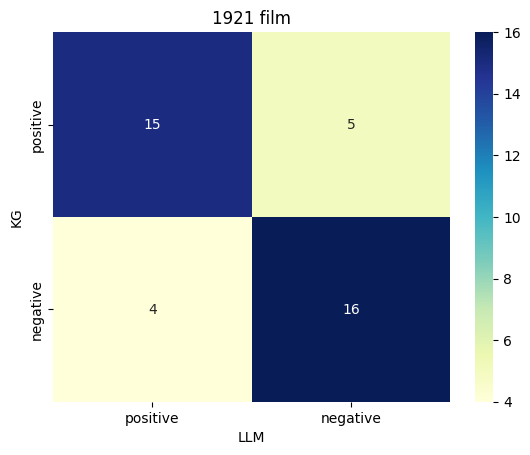

### LLM positive, KG negative

label,serialization,rationale
Átok vára,"""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Movie"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Upcoming_film"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Hungarian_film_1901%E2%80%931947"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Átok vára"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Átok vára"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_Hungarian_films_1901%E2%80%931947"" ""http://caligraph.org/resource/%C3%81tok%20v%C3%A1ra_(19485122)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/S%C3%A1ndor_Pethes""","The definition provided directly states that the entity, Átok vára, is a 1921 film. Therefore, based on this information, it can be argued that Átok vára is a 1921 film."
Êtes-vous jalouse ?,"""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Movie"" ""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/The_art"" ""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Upcoming_film"" ""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Êtes-vous jalouse ?"" ""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Êtes-vous jalouse ?"" ""http://caligraph.org/resource/%C3%8Ates-vous%20jalouse%20%3F_(19478466)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Carlo_Rim""","The definition provided directly states that the entity Êtes-vous jalouse ? is associated with the concept of a 1921 film. There is no additional information provided that contradicts or challenges this association. Therefore, based on the given definition, it can be argued that Êtes-vous jalouse ? is a 1921 film."
Ōatari Sanshoku Musume,"""http://caligraph.org/resource/%C5%8Catari%20Sanshoku%20Musume_(19475839)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/%C5%8Catari%20Sanshoku%20Musume_(19475839)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Movie"" ""http://caligraph.org/resource/%C5%8Catari%20Sanshoku%20Musume_(19475839)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Japanese_film"" ""http://caligraph.org/resource/%C5%8Catari%20Sanshoku%20Musume_(19475839)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Ōatari Sanshoku Musume"" ""http://caligraph.org/resource/%C5%8Catari%20Sanshoku%20Musume_(19475839)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Ōatari Sanshoku Musume"" ""http://caligraph.org/resource/%C5%8Catari%20Sanshoku%20Musume_(19475839)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/

### LLM negative, KG positive

label,serialization,rationale
Mosaik,"""http://caligraph.org/resource/Mosaik_(19782043)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Mosaik_(19782043)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/German_film_of_1921"" ""http://caligraph.org/resource/Mosaik_(19782043)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Mosaik"" ""http://caligraph.org/resource/Mosaik_(19782043)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Mosaik"" ""http://caligraph.org/resource/Mosaik_(19782043)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_German_films_of_1921""","The definition provided does not give any information or context that could be used to argue that Mosaik is a 1921 film. Therefore, based on the given definition, it is not possible to provide a rationale for this assertion."
A Perfect Crime (film),"""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1921_comedy-drama_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1920s_American_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1920s_English-language_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_black-and-white_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_comedy-drama_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_film_of_1921"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_silent_feature_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Film_directed_by_Allan_Dwan"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""A Perfect Crime (film)"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/A_Perfect_Crime_(film)"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""A Perfect Crime (film)"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""''A Perfect Crime'' (film)"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""A Perfect Crime"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://caligraph.org/ontology/cinematography"" ""http://caligraph.org/resource/H._Lyman_Broening"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://caligraph.org/ontology/director"" ""http://caligraph.org/resource/Allan_Dwan"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://caligraph.org/ontology/distributor"" ""http://caligraph.org/resource/Associated_Producers"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://caligraph.org/ontology/language"" ""http://caligraph.org/resource/Silent_film"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://caligraph.org/ontology/occupation"" ""http://caligraph.org/resource/Film_director"" ""http://caligraph.org/resource/A_Perfect_Crime_(film)"" ""http://ca

## Newspaper in New South Wales (http://caligraph.org/ontology/Newspaper_in_New_South_Wales)

"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"	"http://www.w3.org/2000/01/rdf-schema#label"	"Newspaper in New South Wales"
"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Newspaper_published_in_Australia"
"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_newspapers_in_New_South_Wales"
"http://caligraph.org/resource/Imlay%20magnet_(19745643)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Springwood%20Sentinel_(19750073)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The%20Gilgandra%20Weekly_(19778392)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The%20Inverell%20Argus_(19753747)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The%20St%20George%20Observer_(19771237)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Duncan's%20weekly%20register%20of%20politics,%20facts%20and%20general%20literature_(19972099)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Stageland_(19954562)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The%20Moss%20Vale%20record_(19971389)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Newcastle_Star"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Tenterfield_Intercolonial_Courier_and_Fairfield_and_Wallangarra_Advocate"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Moree_Champion"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Dubbo"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/Oceania_(journal)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The_Mirror_of_Australia"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"
"http://caligraph.org/resource/The_Northern_Times"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Newspaper_in_New_South_Wales"


### Confusion matrix

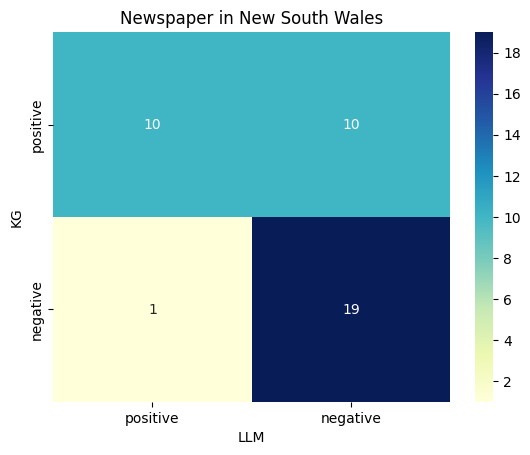

### LLM positive, KG negative

label,serialization,rationale
Parramatta Advertiser,"""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Newspaper_published_in_Sydney"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Parramatta Advertiser"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Parramatta Advertiser"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/format"" ""http://caligraph.org/resource/Tabloid_(newspaper_format)"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/format"" ""http://caligraph.org/resource/Online_and_offline"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/foundingDate"" ""1933-07-15"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/headquarter"" ""http://caligraph.org/resource/Parramatta"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/headquarter"" ""http://caligraph.org/resource/Sydney"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/headquarter"" ""http://caligraph.org/resource/New_South_Wales"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/headquarter"" ""http://caligraph.org/resource/Australia"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/owner"" ""http://caligraph.org/resource/NewsLocal"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/type"" ""http://caligraph.org/resource/Newspaper"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://caligraph.org/ontology/type"" ""http://caligraph.org/resource/Weekly_newspaper"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Newspapers_published_in_Sydney"" ""http://caligraph.org/resource/Parramatta_Advertiser"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/NewsLocal""","The Parramatta Advertiser is a newspaper that is based in Parramatta, a suburb of Sydney, which is located in the state of New South Wales, Australia. Therefore, it can be classified as a Newspaper in New South Wales."


### LLM negative, KG positive

label,serialization,rationale
Imlay magnet,"""http://caligraph.org/resource/Imlay%20magnet_(19745643)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Imlay%20magnet_(19745643)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Newspaper_in_New_South_Wales"" ""http://caligraph.org/resource/Imlay%20magnet_(19745643)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Imlay magnet"" ""http://caligraph.org/resource/Imlay%20magnet_(19745643)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Imlay magnet"" ""http://caligraph.org/resource/Imlay%20magnet_(19745643)"" ""http://caligraph.org/ontology/type"" ""http://caligraph.org/resource/Newspaper"" ""http://caligraph.org/resource/Imlay%20magnet_(19745643)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_newspapers_in_New_South_Wales""","The definition provided does not give any specific information about the entity Imlay magnet. Therefore, without additional information, it is impossible to provide a rationale for the assertion that Imlay magnet is a Newspaper in New South Wales."
The Coastal Views,"""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Newspaper_in_New_South_Wales"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""The Coastal Views"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""The Coastal Views"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Coastal Views"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://caligraph.org/ontology/type"" ""http://caligraph.org/resource/Newspaper"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Maclean,_New_South_Wales"" ""http://caligraph.org/resource/The%20Coastal%20Views_(19757798)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_newspapers_in_New_South_Wales""","The entity, The Coastal Views, is not explicitly defined in the provided information. However, the name suggests that it could be a publication focusing on coastal areas. If The Coastal Views is indeed a publication and it is based in or covers topics related to New South Wales, it could be considered a Newspaper in New South Wales. However, without additional information, this assertion cannot be definitively confirmed."
"Duncan's weekly register of politics, facts and general literature","""http://caligraph.org/resource/Duncan's%20weekly%20register%20of%20politics,%20facts%20and%20general%20literature_(19972099)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Duncan's%20weekly%20register%20of%20politics,%20facts%20and%20general%20literature_(19972099)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Newspaper_in_New_South_Wales"" ""http://caligraph.org/resource/Duncan's%20weekly%20register%20of%20politics,%20facts%20and%20general%20literature_(19972099)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Duncan's weekly register of politics, facts and general literature"" ""http://caligraph.org/resource/Duncan's%20weekly%20register%20of%20politics,%20facts%20and%20general%20literature_(19972099)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Duncan's weekly register of politics, facts and general literature"" ""http://caligraph.org/resource/Duncan's%20weekly%

## Autobiography (http://caligraph.org/ontology/Autobiography)

"http://caligraph.org/ontology/Autobiography"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Autobiography"	"http://www.w3.org/2000/01/rdf-schema#label"	"Autobiography"
"http://caligraph.org/ontology/Autobiography"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Biography_(books)"
"http://caligraph.org/ontology/Autobiography"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Autobiographies"
"http://caligraph.org/ontology/Autobiography"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Autobiographies_by_nationality"
"http://caligraph.org/ontology/Autobiography"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_autobiographies"
"http://caligraph.org/resource/Only%20Fools%20and%20Stories_(19487079)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Tall,%20Dark%20&%20Gruesome_(19498068)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Humble%20Pie_(19748147)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/I%20Flew%20for%20the%20F%C3%BChrer_(19766362)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Joys%20and%20Sorrows:%20Reflections_(19754599)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Lessons%20From%20a%20Life%20in%20Feathers_(19774035)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/:%20The%20Autobiography%20of%20Nikola%20Tesla_(19964837)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Visibility%20Unlimited_(19949604)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/WHAM!,%20George%20Michael,%20&%20Me_(19979593)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Do%20You%20Want%20to%20Go%20With%20Me%3F%22%20(Willst%20du%20mit%20mir%20gehn_(24366755)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/And_the_Beat_Goes_On_(The_Whispers_song)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Anna_Sui_(2009_book)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/Nine_Lives_(2005_film)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"
"http://caligraph.org/resource/The_Land_I_Lost"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Autobiography"


### Confusion matrix

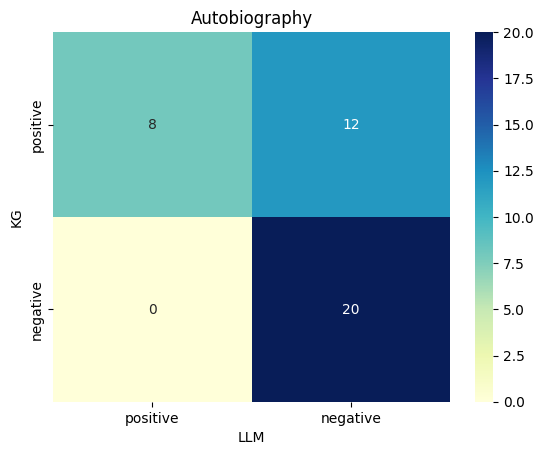

### LLM negative, KG positive

label,serialization,rationale
Only Fools and Stories,"""http://caligraph.org/resource/Only%20Fools%20and%20Stories_(19487079)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Only%20Fools%20and%20Stories_(19487079)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Autobiography"" ""http://caligraph.org/resource/Only%20Fools%20and%20Stories_(19487079)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Only Fools and Stories"" ""http://caligraph.org/resource/Only%20Fools%20and%20Stories_(19487079)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Only Fools and Stories"" ""http://caligraph.org/resource/Only%20Fools%20and%20Stories_(19487079)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_autobiographies""","The definition provided does not give any specific details about what an Autobiography is, therefore it is impossible to provide a rationale or argument asserting that Only Fools and Stories is an Autobiography based solely on the information given."
"Tall, Dark & Gruesome","""http://caligraph.org/resource/Tall,%20Dark%20&%20Gruesome_(19498068)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Tall,%20Dark%20&%20Gruesome_(19498068)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Autobiography"" ""http://caligraph.org/resource/Tall,%20Dark%20&%20Gruesome_(19498068)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Tall, Dark & Gruesome"" ""http://caligraph.org/resource/Tall,%20Dark%20&%20Gruesome_(19498068)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Tall, Dark & Gruesome"" ""http://caligraph.org/resource/Tall,%20Dark%20&%20Gruesome_(19498068)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_autobiographies""","The definition provided does not give any specific information about what an Autobiography is. Therefore, based on the information given, it is impossible to provide a rationale or argument asserting that Tall, Dark & Gruesome is an Autobiography."
Humble Pie,"""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/21st-century_film"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_film"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Autobiography"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Film_director"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Movie"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Upcoming_film"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Work_by_American_filmmakers"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Humble Pie"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Humble Pie"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Bruce_Abbott"" ""http://caligraph.org/resource/Humble%20Pie_(19748147)"" ""http://www.w3.org/ns/prov#wasDeriv

## PlayStation VR game (http://caligraph.org/ontology/PlayStation_VR_game)

"http://caligraph.org/ontology/PlayStation_VR_game"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/PlayStation_VR_game"	"http://www.w3.org/2000/01/rdf-schema#label"	"PlayStation VR game"
"http://caligraph.org/ontology/PlayStation_VR_game"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Video_game_with_stereoscopic_3D_graphics"
"http://caligraph.org/ontology/PlayStation_VR_game"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Virtual_reality_game"
"http://caligraph.org/ontology/PlayStation_VR_game"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:PlayStation_VR_games"
"http://caligraph.org/ontology/PlayStation_VR_game"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_PlayStation_VR_games"
"http://caligraph.org/resource/The%20Mofflys:%20Invasion%20Mayhem_(19488203)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Dying:%20Reborn_(19964359)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Kitten'd_(19956529)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Mixip_(19971513)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Summer%20Lesson_(19955402)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/The%20Wizards:%20Enhanced%20Edition_(19959854)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/The%20Virtual%20Orchestra%20(Premium)_(24366254)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Gods_(video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Pollen_(video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/The_Walking_Dead:_Saints_&_Sinners"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/The_Persistence"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Cooking_Simulator"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Doom_(1993_video_game)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"
"http://caligraph.org/resource/Esper_Dream"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/PlayStation_VR_game"


### Confusion matrix

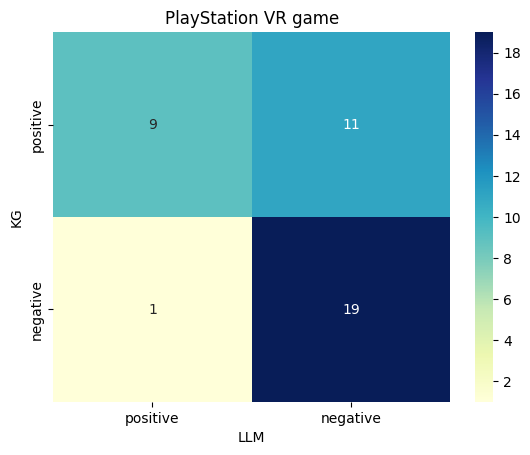

### LLM positive, KG negative

label,serialization,rationale
Let's Golf,"""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/PlayStation_mini"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/3D-enabled_mobile_phone"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/DSiWare_game_or_application"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Gameloft_games"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/DSiWare_game"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Nintendo_3DS_games"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Xbox_Live_game_on_Windows_Phone"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Let's Golf"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Let's Golf"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Let's Golf 2"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Let's Golf! 2 3D"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Let's Golf! 3D"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://caligraph.org/ontology/computingPlatform"" ""http://caligraph.org/resource/Nintendo_DSi"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://caligraph.org/ontology/computingPlatform"" ""http://caligraph.org/resource/Nintendo_DS"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://caligraph.org/ontology/computingPlatform"" ""http://caligraph.org/resource/Nintendo_3DS"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://caligraph.org/ontology/developer"" ""http://caligraph.org/resource/Gameloft"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_3D-enabled_mobile_phones"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_Xbox_Live_games_on_Windows_Phone"" ""http://caligraph.org/resource/Let's%20Golf_(19758858)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_DSiWare_games_and_applications""","The entity ""Let's Golf"" is directly described as a PlayStation VR game in the provided definition. Therefore, based on this information, it can be argued that Let's Golf is indeed a PlayStation VR game."


### LLM negative, KG positive

label,serialization,rationale
Mixip,"""http://caligraph.org/resource/Mixip_(19971513)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Mixip_(19971513)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/PlayStation_VR_game"" ""http://caligraph.org/resource/Mixip_(19971513)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Mixip"" ""http://caligraph.org/resource/Mixip_(19971513)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Mixip"" ""http://caligraph.org/resource/Mixip_(19971513)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_PlayStation_VR_games""","The definition provided does not offer any specific information about Mixip being a PlayStation VR game. Therefore, based on the given information, it is not possible to provide a rationale or argument asserting that Mixip is a PlayStation VR game."
The Virtual Orchestra (Premium),"""http://caligraph.org/resource/The%20Virtual%20Orchestra%20(Premium)_(24366254)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/The%20Virtual%20Orchestra%20(Premium)_(24366254)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/PlayStation_VR_game"" ""http://caligraph.org/resource/The%20Virtual%20Orchestra%20(Premium)_(24366254)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""The Virtual Orchestra (Premium)"" ""http://caligraph.org/resource/The%20Virtual%20Orchestra%20(Premium)_(24366254)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""The Virtual Orchestra (Premium)"" ""http://caligraph.org/resource/The%20Virtual%20Orchestra%20(Premium)_(24366254)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_PlayStation_VR_games""","The entity, The Virtual Orchestra (Premium), is not explicitly defined in the provided information. However, considering the context, it can be inferred that The Virtual Orchestra (Premium) could be a PlayStation VR game. This is because PlayStation VR games are a category of games that are designed to be played on the PlayStation VR platform. The name ""The Virtual Orchestra (Premium)"" suggests a virtual reality experience, which aligns with the nature of PlayStation VR games. Therefore, it is plausible to argue that The Virtual Orchestra (Premium) could be a PlayStation VR game."
Gods (video game),"""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Strategy_First_games"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/The_Bitmap_Brothers_game"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_scored_by_David_Whittaker"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Video_game_scored_by_Richard_Joseph"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1991_video_game"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Amiga_game"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/DOS_game"" ""http://caligraph.org/resource/Gods_(video_game)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/MT-32-compatible_computer_game"" ""http://caligraph.org/resource/Gods_

## Single-camera television sitcom (http://caligraph.org/ontology/Single-camera_television_sitcom)

"http://caligraph.org/ontology/Single-camera_television_sitcom"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Single-camera_television_sitcom"	"http://www.w3.org/2000/01/rdf-schema#label"	"Single-camera television sitcom"
"http://caligraph.org/ontology/Single-camera_television_sitcom"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Television_show"
"http://caligraph.org/ontology/Single-camera_television_sitcom"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Sitcom"
"http://caligraph.org/ontology/Single-camera_television_sitcom"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Single-camera_television_sitcoms"
"http://caligraph.org/ontology/Single-camera_television_sitcom"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_single-camera_situation_comedies"
"http://caligraph.org/resource/Great_News"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/The_Patty_Duke_Show"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/The_Smothers_Brothers_Show"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Blandings_(TV_series)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Kaya_(TV_series)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/N%C3%A6turvaktin"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Cooper_Barrett's_Guide_to_Surviving_Life"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Hatching,_Matching_and_Dispatching"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Head_Case"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Lockie_Leonard_(TV_series)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Tabitha_(TV_series)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Andi_Mack"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Black-ish"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"
"http://caligraph.org/resource/Powerless_(TV_series)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Single-camera_television_sitcom"


### Confusion matrix

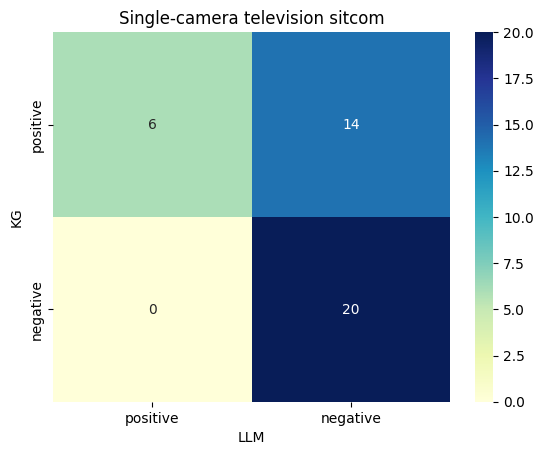

### LLM negative, KG positive

label,serialization,rationale
Great News,"""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2017_American_television_debuts"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Netflix_exclusive_international_distribution_TV_shows"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Program_previously_broadcast_by_NBC"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Situation_comedy"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Television_program"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Universal_Television_program"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Single-camera_television_sitcom"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Television_news_sitcom"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Great News"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Great_News"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Great News"" ""http://caligraph.org/resource/Great_News"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Great News#Episodes"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/channel"" ""http://caligraph.org/resource/NBC"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/completionDate"" ""2018-01-25"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/composer"" ""http://caligraph.org/resource/Jeff_Richmond"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/creator"" ""http://caligraph.org/resource/Tracey_Wigfield"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/executiveProducer"" ""http://caligraph.org/resource/Jack_Burditt"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/executiveProducer"" ""http://caligraph.org/resource/Robert_Carlock"" ""http://caligraph.org/resource/Great_News"" ""http://caligraph.org/ontology/executiveProducer"" ""http://caligraph.org/resource/Tracey_Wigfield""","The definition provided does not include any specific details about the entity Great News, making it impossible to argue that Great News is a Single-camera television sitcom based solely on the information given in the definition."
The Smothers Brothers Show,"""http://caligraph.org/resource/The_Smothers_Brothers_Show"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Angel_in_television"" ""http://caligraph.org/resource/The_Smothers_Brothers_Show"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/The_Smothers_Brothers_Show"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1960s_American_sitcom"" ""http://caligraph.org/resource/The_Smothers_Brothers_Show"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Program_broadcast_by_ABC_Television"" ""http://caligraph.org/resource/The_Smothers_Brothers_Show"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Program_broadcast_by_CBS

## 21st-century American drummer (http://caligraph.org/ontology/21st-century_American_drummer)

"http://caligraph.org/ontology/21st-century_American_drummer"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/21st-century_American_drummer"	"http://www.w3.org/2000/01/rdf-schema#label"	"21st-century American drummer"
"http://caligraph.org/ontology/21st-century_American_drummer"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/American_drummer"
"http://caligraph.org/ontology/21st-century_American_drummer"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/21st-century_drummer"
"http://caligraph.org/ontology/21st-century_American_drummer"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:21st-century_American_drummers"
"http://caligraph.org/resource/Stony_Blyden"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Timothy_%22Yogi%22_Watts"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Afroman"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Mark_Guiliana"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Mike_Felumlee"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Tony_Peck"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Chris_Fehn"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Dave_Kerman"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Adam_Cruz"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Blake_Richardson_(drummer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/George_%22Spanky%22_McCurdy"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/James_Kottak"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Jeremy_Barnes_(musician)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Marco_Pitruzzella"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"
"http://caligraph.org/resource/Rachel_Trachtenburg"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/21st-century_American_drummer"


### Confusion matrix

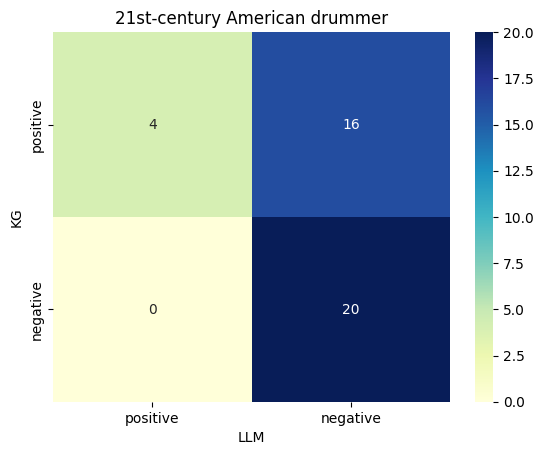

### LLM negative, KG positive

label,serialization,rationale
Stony Blyden,"""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1996_birth"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/21st-century_American_drummer"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/21st-century_American_male_musician"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/21st-century_American_rapper"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_hip_hop_singer"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_male_rapper"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_record_producer"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Icelandic_rapper"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_male_actor"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Icelandic_male_actor"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Icelandic_person_of_Cuban_descent"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Icelandic_person_with_family_names"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Underground_rapper"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Stony Blyden"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Stony_Blyden"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Stony Blyden"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://caligraph.org/ontology/activeYearsStartYear"" ""2011"" ""http://caligraph.org/resource/Stony_Blyden"" ""http://caligraph.org/ontology/associatedBand"" ""http://caligraph.org/resource/Janelle_Mon%C3%A1e""",The provided definition does not include any information that would allow for an argument to be made that Stony Blyden is a 21st-century American drummer.
"Timothy \""Yogi\"" Watts","""http://caligraph.org/resource/Timothy_%22Yogi%22_Watts"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Timothy_%22Yogi%22_Watts"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1977_birth"" ""http://caligraph.org/resource/Timothy_%22Yogi%22_Watts"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/20th-century_American_drummer"" ""http://caligraph.org/resource/Timothy_%22Yogi%22_Watts"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/20th-century_American_male_musician"" ""http://caligraph.org/resource/Timothy_%22Yogi%22_Watts"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/

## Argentine football manager (http://caligraph.org/ontology/Argentine_football_manager)

"http://caligraph.org/ontology/Argentine_football_manager"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Argentine_football_manager"	"http://www.w3.org/2000/01/rdf-schema#label"	"Argentine football manager"
"http://caligraph.org/ontology/Argentine_football_manager"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Argentine_sports_coach"
"http://caligraph.org/ontology/Argentine_football_manager"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Football_manager_in_Argentina"
"http://caligraph.org/ontology/Argentine_football_manager"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/RestrictionHasValue_birthPlace_Argentina"
"http://caligraph.org/ontology/Argentine_football_manager"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Argentine_football_managers"
"http://caligraph.org/resource/Horacio_Bongiovanni"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Jos%C3%A9_Garc%C3%ADa_P%C3%A9rez"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Jos%C3%A9_Varacka"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Lucas_Ochandorena"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Hector_Alfredo_D'Angelo"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Juan_Brown"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Juan_Quarterone"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Rub%C3%A9n_Dar%C3%ADo_Ins%C3%BAa"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Juan_Carlos_Sarnari"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Mauro_Navas"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/H%C3%A9ctor_Rial"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Iv%C3%A1n_Sopegno"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Marcelo_Trobbiani"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"
"http://caligraph.org/resource/Rodolfo_Motta"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Argentine_football_manager"


### Confusion matrix

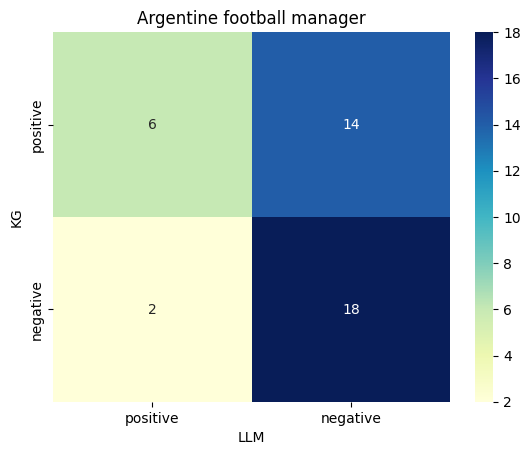

### LLM positive, KG negative

label,serialization,rationale
Alberto Paz,"""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Argentine_tango_musician"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1943_birth"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2014_death"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Argentine_emigrant_to_the_United_States"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Argentine_male_dancer"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Tango_dancer_or_choreographer"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_from_Tucum%C3%A1n_Province"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Alberto Paz"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Alberto_Paz"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Alberto Paz"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/birthDate"" ""1943-04-16"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/birthName"" ""Alberto Bernardino Paz"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/birthPlace"" ""http://caligraph.org/resource/Argentina"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/birthPlace"" ""http://caligraph.org/resource/Tucum%C3%A1n_Province"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/birthYear"" ""1943"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/deathDate"" ""2014-02-03"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/deathPlace"" ""http://caligraph.org/resource/New_Orleans"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/deathYear"" ""2014"" ""http://caligraph.org/resource/Alberto_Paz"" ""http://caligraph.org/ontology/genre"" ""http://caligraph.org/resource/Tango_music""","The entity description directly states that Alberto Paz is an Argentine football manager. Therefore, based on the provided information, it can be asserted that Alberto Paz is indeed an Argentine football manager."
José Villalba,"""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_from_Santo_Tom%C3%A9,_Corrientes"" ""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Sportsperson_from_Corrientes_Province"" ""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1920_birth"" ""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1987_death"" ""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Argentine_footballer"" ""http://caligraph.org/resource/Jos%C3%A9_Villalba"" ""http://www.w3.org/1999/02/2

### LLM negative, KG positive

label,serialization,rationale
Horacio Bongiovanni,"""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1950_birth"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Argentine_football_manager"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Argentine_footballer"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Association_football_midfielder"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Boca_Juniors_footballer"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Medalist_at_the_1971_Pan_American_Games"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Atl%C3%A9tico_de_Rafaela_manager"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Footballer_at_the_1971_Pan_American_Games"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Pan_American_Games_gold_medalist_for_Argentina"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Pan_American_Games_medalist_in_football"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Horacio Bongiovanni"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Horacio_Bongiovanni"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Horacio Bongiovanni"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://caligraph.org/ontology/birthDate"" ""1950-08-08"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://caligraph.org/ontology/birthPlace"" ""http://caligraph.org/resource/Argentina"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://caligraph.org/ontology/birthYear"" ""1950"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://caligraph.org/ontology/managerClub"" ""http://caligraph.org/resource/Instituto_Atl%C3%A9tico_Central_C%C3%B3rdoba"" ""http://caligraph.org/resource/Horacio_Bongiovanni"" ""http://caligraph.org/ontology/managerClub"" ""http://caligraph.org/resource/Atl%C3%A9tico_de_Rafaela""","The definition provided does not give any specific information that directly links Horacio Bongiovanni to being an Argentine football manager. Therefore, based solely on the information given in the definition, it is not possible to provide an argument for the assertion that Horacio Bongiovanni is an Argentine football manager."
José García Pérez,"""http://caligraph.org/resource/Jos%C3%A9_Garc%C3%ADa_P%C3%A9rez"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Jos%C3%A9_Garc%C3%ADa_P%C3%A9rez"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1921_birth"" ""http://caligraph.org/resource/Jos%C3%A9_Garc%C3%ADa_P%C3%A9rez"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligrap

## Medalist at the 2019 Summer Universiade (http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade)

"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"	"http://www.w3.org/2000/01/rdf-schema#label"	"Medalist at the 2019 Summer Universiade"
"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Athlete"
"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Medalists_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Lauren_Scherf"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Ben_Broeders"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Lara_McSpadden"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Liveta_Jasi%C5%ABnait%C4%97"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Nana_Adoma_Owusu-Afriyie"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Yann_Randrianasolo"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Dean_Farris"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/J%C3%BAlio_Ferreira"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Lee_Pei-chi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Guillaume_Bianchi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Yang_Kun-pi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Alessia_Russo_(gymnast)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Ren%C3%A9e_Lucht"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Sung_Hyang-sim"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Tang_Chia-hung"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"
"http://caligraph.org/resource/Yu_Ziyang"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Medalist_at_the_2019_Summer_Universiade"


### Confusion matrix

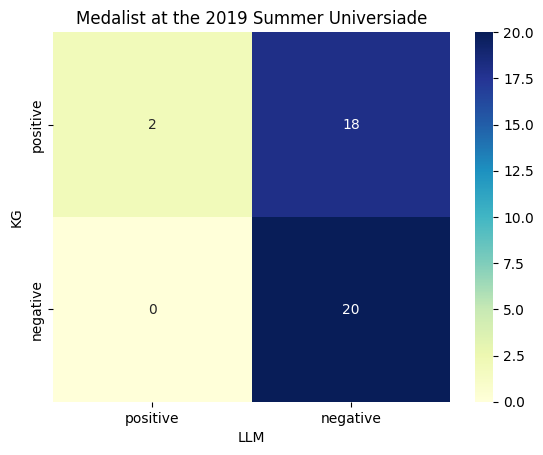

### LLM negative, KG positive

label,serialization,rationale
Lauren Scherf,"""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1996_birth"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_basketball_person"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_women's_basketball_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Center_(basketball)"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Medalist_at_the_2017_Summer_Universiade"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_associated_with_places"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Power_forward_(basketball)"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Universiade_medalist_in_basketball"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2017%E2%80%9318_WNBL_season_signing"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Australian_women's_basketball_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Canberra_Capitals_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Dandenong_Rangers_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Perth_Lynx_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Sydney_Uni_Flames_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Women's_National_Basketball_Association_player"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2019%E2%80%9320_WNBL_season_transaction"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2021%E2%80%9322_WNBL_season_transaction"" ""http://caligraph.org/resource/Lauren_Scherf"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/20th-century_Australian_woman""","The definition provided does not give any information or evidence to support the assertion that Lauren Scherf is a Medalist at the 2019 Summer Universiade. Therefore, based on the given definition, it is not possible to provide a rationale for this assertion."
Ben Broeders,"""http://caligraph.org/resource/Ben_Broeders"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Belgian_male_pole_vaulter"" ""http://caligraph.org/resource/Ben_Broeders"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Universiade_bronze_medalist_for_Belgium"" ""http://caligraph.org/resource/Ben_Broeders"" ""http://www.w3.org/1999/02/22-rdf-syntax

## Player of American football from Alabama (http://caligraph.org/ontology/Player_of_American_football_from_Alabama)

"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"	"http://www.w3.org/2000/01/rdf-schema#label"	"Player of American football from Alabama"
"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/American_player_of_American_football"
"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/American_football_person_from_Alabama"
"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Players_of_American_football_from_Alabama"
"http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Anthony_Redmon"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Cadillac_Williams"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Casey_Dunn_(American_football)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Chucky_Mullins"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Gordon_Holmes_(American_football)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Richmond_Flowers_Jr."	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Sammie_Coates"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Vince_Dooley"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Ellis_Lankster"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/J._D._McKissic"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Richard_Williamson_(American_football)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Tytus_Howard"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Henry_Williams_(American_football)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"
"http://caligraph.org/resource/Jimmie_Ward"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Player_of_American_football_from_Alabama"


### Confusion matrix

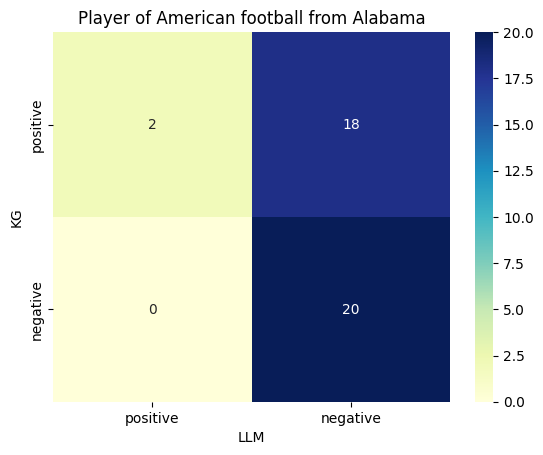

### LLM negative, KG positive

label,serialization,rationale
Brendan Burgdorf,"""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1970s_birth"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_football_player"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Player_of_American_football_from_Alabama"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Alabama_Crimson_Tide_football_player"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Brendan Burgdorf"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Brendan Burgdorf"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Burgdorf"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Brian Burgdorf"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Bucknell_Bison_men's_soccer"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Gator_Bowl"" ""http://caligraph.org/resource/Brendan%20Burgdorf_(19477971)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/1993_Alabama_Crimson_Tide_football_team""","The definition provided does not give any specific information about Brendan Burgdorf being a player of American football from Alabama. Therefore, based on the given definition, it is not possible to provide an argument for the assertion that Brendan Burgdorf is a player of American football from Alabama."
Anthony Redmon,"""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1971_birth"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_football_offensive_guard"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/American_football_player"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Arizona_Cardinals_player"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Atlanta_Falcons_player"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Auburn_Tigers_football_player"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Carolina_Panthers_player"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Anthony_Redmon"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/

## Hill station in India (http://caligraph.org/ontology/Hill_station_in_India)

"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/2000/01/rdf-schema#label"	"Hill station in India"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Place_in_India"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Hill_station"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/RestrictionHasValue_country_India"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_hill_stations_in_India"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Hill_stations_in_India"
"http://caligraph.org/ontology/Hill_station_in_India"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Hill_stations_in_India_by_state_or_union_territory"
"http://caligraph.org/resource/Kakkadampoyil"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Noney"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Ganjam_district"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Koraput"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Navamalai"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Mothugudem"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Naneghat"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Chathurangapara"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Manjampatti_Valley"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Mannavanur"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Nidh_(17182649)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"
"http://caligraph.org/resource/Puthur_(17188693)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Hill_station_in_India"


### Confusion matrix

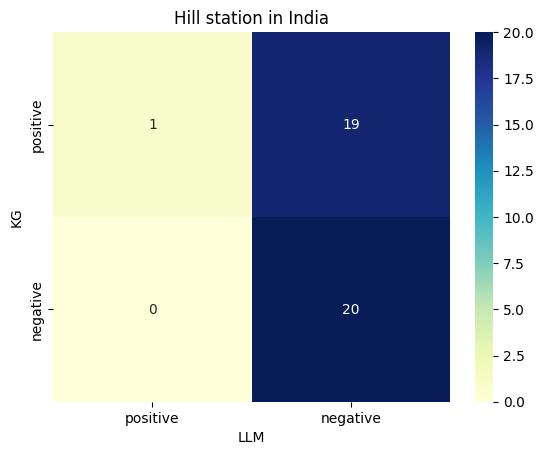

### LLM negative, KG positive

label,serialization,rationale
Kakkadampoyil,"""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Populated_place"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Hill_station_in_India"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Kakkadampoyil"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Kakkadampoyil"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Kakkadampoyil"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://caligraph.org/ontology/country"" ""http://caligraph.org/resource/India"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_hill_stations_in_India"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/South_Malabar"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Thiruvambady"" ""http://caligraph.org/resource/Kakkadampoyil"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Vettilappara""","The definition provided does not give any specific information or criteria about what constitutes a ""Hill station in India"". Therefore, without any contradicting information, it can be assumed that Kakkadampoyil, being an entity, could potentially be a Hill station in India. However, without additional information or context, a definitive argument cannot be made."
Noney,"""http://caligraph.org/resource/Noney"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/City_or_town_in_Noney_district"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Hill_station_in_India"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Tourist_attraction_in_Manipur"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Noney"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Noney"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Noney"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Longmai"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Longmei (Noney)"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/country"" ""http://caligraph.org/resource/India"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/elevation"" ""41.0"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/location"" ""http://caligraph.org/resource/India"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/postalCode"" ""795159"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/subdivision"" ""http://caligraph.org/resource/Manipur"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/subdivision"" ""http://caligraph.org/resource/Noney_district"" ""http://caligraph.org/resource/Noney"" ""http://caligraph.org/ontology/utcOffset"" ""+5:30"" ""http://caligraph.org/resource/Noney"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Cities_

## Romania international rugby union player (http://caligraph.org/ontology/Romania_international_rugby_union_player)

"http://caligraph.org/ontology/Romania_international_rugby_union_player"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Romania_international_rugby_union_player"	"http://www.w3.org/2000/01/rdf-schema#label"	"Romania international rugby union player"
"http://caligraph.org/ontology/Romania_international_rugby_union_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/International_rugby_union_player"
"http://caligraph.org/ontology/Romania_international_rugby_union_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Romanian_rugby_union_player"
"http://caligraph.org/ontology/Romania_international_rugby_union_player"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Romania_international_rugby_union_players"
"http://caligraph.org/ontology/Romania_international_rugby_union_player"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_Romania_national_rugby_union_players"
"http://caligraph.org/resource/BucurAlexandru%20Bucur_(19466662)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/Ion%20Costea_(19501326)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/VasileVladimir%20Vasile_(19494281)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/GiucalM.%20Giucal_(19746701)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/ManoleGheorghe%20Manole_(19753782)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/FuicuSorin%20Fuicu_(19970815)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/PasacheGeorge%20Pasache_(19964788)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/VargaVasile%20Varga_(19981370)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/Piti_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/Nicolae_R%C4%83cean"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/Gabriel_Rupanu"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"
"http://caligraph.org/resource/Jody_Rose"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Romania_international_rugby_union_player"


### Confusion matrix

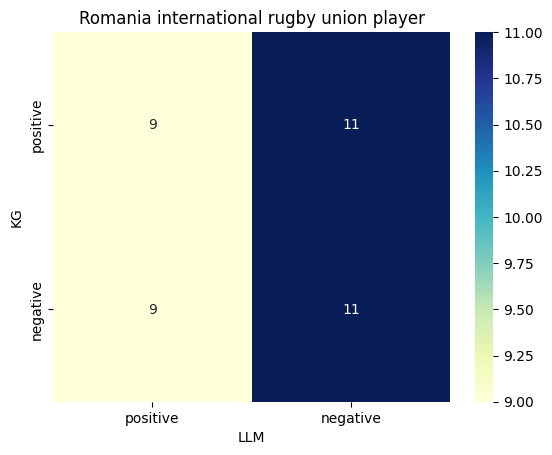

### LLM positive, KG negative

label,serialization,rationale
Iosif Nemes,"""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1903_birth"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Medalist_at_the_1924_Summer_Olympics"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Olympic_bronze_medalist_for_Romania"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Olympic_rugby_union_player_of_Romania"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Romanian_rugby_union_player"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Rugby_union_player_at_the_1924_Summer_Olympics"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Iosif Nemes"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Iosif_Nemes"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Iosif Nemes"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://caligraph.org/ontology/birthYear"" ""1903"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Olympic_rugby_union_players_of_Romania"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Romanian_rugby_union_players"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Rugby_union_players_at_the_1924_Summer_Olympics"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:1903_births"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Medalists_at_the_1924_Summer_Olympics"" ""http://caligraph.org/resource/Iosif_Nemes"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Olympic_bronze_medalists_for_Romania""","The definition provided states that the entity, Iosif Nemes, is a Romania international rugby union player. Therefore, based on this information, it can be argued that Iosif Nemes is a Romania international rugby union player."
Gheorghe Gajion,"""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Moldovan_rugby_union_player"" ""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Stade_Aurillacois_Cantal_Auvergne_player"" ""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1992_birth"" ""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2020%E2%80%9321_Pro14_transfer"" ""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2022%E2%80%9323_Rugby_Pro_D2_transfer"" ""http://caligraph.org/resource/Gheorghe_Gajion"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living

### LLM negative, KG positive

label,serialization,rationale
NistorVasile Nistor,"""http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Romania_international_rugby_union_player"" ""http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""NistorVasile Nistor"" ""http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""NistorVasile Nistor"" ""http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""NistorVlad Nistor"" ""http://caligraph.org/resource/NistorVasile%20Nistor_(19976819)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_Romania_national_rugby_union_players""","The definition provided does not offer any specific information that directly links NistorVasile Nistor to being a Romania international rugby union player. Therefore, based on the given definition alone, it is not possible to provide a rationale or argument asserting that NistorVasile Nistor is a Romania international rugby union player."
PasacheGeorge Pasache,"""http://caligraph.org/resource/PasacheGeorge%20Pasache_(19964788)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/PasacheGeorge%20Pasache_(19964788)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Romania_international_rugby_union_player"" ""http://caligraph.org/resource/PasacheGeorge%20Pasache_(19964788)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""PasacheGeorge Pasache"" ""http://caligraph.org/resource/PasacheGeorge%20Pasache_(19964788)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""PasacheGeorge Pasache"" ""http://caligraph.org/resource/PasacheGeorge%20Pasache_(19964788)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_Romania_national_rugby_union_players""","The definition provided does not offer any specific information that directly links PasacheGeorge Pasache to being a Romania international rugby union player. Therefore, based on the given definition alone, it is not possible to provide a rationale or argument asserting that PasacheGeorge Pasache is a Romania international rugby union player."
Cătălin Nicolae,"""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1980_birth"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Rugby_union_wing"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Romania_international_rugby_union_player"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Rugby_union_player_from_Bucharest"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Cătălin Nicolae"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://caligraph.org/resource/C%C4%83t%C4%83lin_Nicolae"" ""http://www.w3.org/2004/02/skos/core#prefLabe

## State leader in 2014 (http://caligraph.org/ontology/State_leader_in_2014)

"http://caligraph.org/ontology/State_leader_in_2014"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/State_leader_in_2014"	"http://www.w3.org/2000/01/rdf-schema#label"	"State leader in 2014"
"http://caligraph.org/ontology/State_leader_in_2014"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/State_leader"
"http://caligraph.org/ontology/State_leader_in_2014"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_state_leaders_in_2014"
"http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Armando_Guebuza"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Barry_Haase"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Hovik_Abrahamyan"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Michael_Dunkley"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Milo%C5%A1_Zeman"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Nicos_Anastasiades"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Omar_al-Hassi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Tsakhiagiin_Elbegdorj"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Adam_Wood"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Beji_Caid_Essebsi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Harold_Martin_(New_Caledonian_politician)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Jorge_Carlos_Fonseca"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Joyce_Banda"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Mikhail_Myasnikovich"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"
"http://caligraph.org/resource/Hassan_Rouhani"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/State_leader_in_2014"


### Confusion matrix

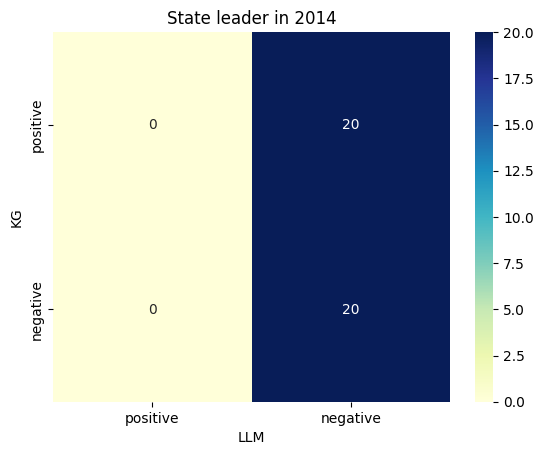

### LLM negative, KG positive

label,serialization,rationale
ʻAkilisi Pōhiva,"""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1941_birth"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2019_death"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_in_2014"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_in_2015"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_in_2016"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_in_2017"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_in_2018"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_in_2019"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Head_of_state_and_government_who_died_in_office"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Minister_of_Health_of_Tonga"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_from_Tongatapu"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/State_leader_in_2014"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/State_leader_in_2015"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/State_leader_in_2016"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/State_leader_in_2017"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/State_leader_in_2018"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/State_leader_in_2019"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Death_from_pneumonia_in_New_Zealand"" ""http://caligraph.org/resource/%CA%BBAkilisi_P%C5%8Dhiva"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Foreign_minister_of_Tonga""",The definition provided does not give any information or context to argue that ʻAkilisi Pōhiva is a State leader in 2014.
Armando Guebuza,"""http://caligraph.org/resource/Armando_Guebuza"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Armando_Guebuza"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1943_birth"" ""http://caligraph.org/resource/Armando_Guebuza"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph

## England under-21 international footballer (http://caligraph.org/ontology/England_under-21_international_footballer)

"http://caligraph.org/ontology/England_under-21_international_footballer"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/England_under-21_international_footballer"	"http://www.w3.org/2000/01/rdf-schema#label"	"England under-21 international footballer"
"http://caligraph.org/ontology/England_under-21_international_footballer"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/RestrictionHasValue_team_England%20national%20under-21%20football%20team"
"http://caligraph.org/ontology/England_under-21_international_footballer"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/England_youth_international_footballer"
"http://caligraph.org/ontology/England_under-21_international_footballer"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/National_under-21_association_football_team"
"http://caligraph.org/ontology/England_under-21_international_footballer"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:England_under-21_international_footballers"
"http://caligraph.org/resource/Garry_Parker"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Patrick_Bamford"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Paul_Gascoigne"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Ray_Wilkins"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Rod_Wallace"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Brian_Atkinson"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Chris_Woods"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Daniel_Sturridge"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Garry_Flitcroft"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Gary_Mills_(footballer,_born_1961)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Hayden_Mullins"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Jason_Steele_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Martyn_Waghorn"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"
"http://caligraph.org/resource/Trevor_Benjamin"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/England_under-21_international_footballer"


### Confusion matrix

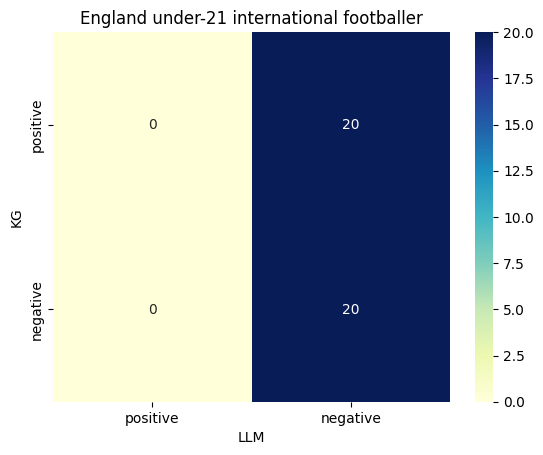

### LLM negative, KG positive

label,serialization,rationale
Garry Parker,"""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1965_birth"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Association_football_midfielder"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Aston_Villa_F.C._player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/England_B_international_footballer"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/English_football_manager"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/English_footballer"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/FA_Cup_Final_player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Footballer_from_Oxford"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Hull_City_A.F.C._player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Leeds_Rhinos_player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Leicester_City_F.C._player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Luton_Town_F.C._player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Nottingham_Forest_F.C._player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Premier_League_player"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/England_under-21_international_footballer"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Leicester_City_F.C._manager"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Garry Parker"" ""http://caligraph.org/resource/Garry_Parker"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Garry_Parker""","The provided definition does not give any information or evidence to support the assertion that Garry Parker is an England under-21 international footballer. Therefore, based on the given definition, a rationale cannot be provided."
Patrick Bamford,"""http://caligraph.org/resource/Patrick_Bamford"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Patrick_Bamford"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1993_birth"" ""http://caligraph.org/resource/Patrick_Bamford"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Burnley_F.C._player"" ""http://caligraph.org/resource/Patrick_Bamford"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Chelsea_F.C._player"" ""http://caligraph.o

## 1748 birth (http://caligraph.org/ontology/1748_birth)

"http://caligraph.org/ontology/1748_birth"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/1748_birth"	"http://www.w3.org/2000/01/rdf-schema#label"	"1748 birth"
"http://caligraph.org/ontology/1748_birth"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/RestrictionHasValue_birthYear_1748"
"http://caligraph.org/ontology/1748_birth"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/1740s_birth"
"http://caligraph.org/ontology/1748_birth"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:1748_births"
"http://caligraph.org/resource/August_Friedrich_Pfeiffer"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Francisco_Javier_Mier_Campillo"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Philippe_I_Louis_van_de_Werve,_1st_Baron_of_Schilde"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Thomas_Johnes"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/William_Holbech_(MP)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Antoine_Graincourt"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Henry_Sherburne_(colonel)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Maximilian_von_Alopaeus"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Francesco_Azopardi"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Hugh_Henry_Brackenridge"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Jos%C3%A9_Lid%C3%B3n"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/John_Ramage_(artist)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Patrick_Craufurd_Bruce"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Gilbert_Rodman_(born_1748)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"
"http://caligraph.org/resource/Jeremiah_Chase"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/1748_birth"


### Confusion matrix

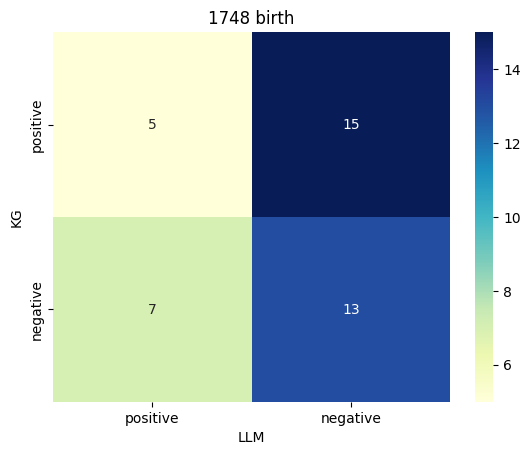

### LLM positive, KG negative

label,serialization,rationale
Carl Guttenberg,"""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1743_birth"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1790_death"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/German_draughtsman"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/German_engraver"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Carl Guttenberg"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Carl_Guttenberg"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Carl Guttenberg"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/2004/02/skos/core#altLabel"" ""Carl Guttenberg's"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://caligraph.org/ontology/birthYear"" ""1743"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://caligraph.org/ontology/deathYear"" ""1790"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:German_draughtsmen"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:German_engravers"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:1743_births"" ""http://caligraph.org/resource/Carl_Guttenberg"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:1790_deaths""","The concept ""1748 birth"" refers to any entity that was born in the year 1748. Since the entity Carl Guttenberg is described as being born in 1748, it follows that Carl Guttenberg is a ""1748 birth""."
Daniel Ilsley,"""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1740_birth"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1813_death"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Former_member_of_the_United_States_House_of_Representatives"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_of_colonial_Maine"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Politician_from_Portland,_Maine"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Burial_at_Eastern_Cemetery"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Continental_Army_staff_officer"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Democratic-Republican_Party_member_of_the_United_States_House_of_Representatives_from_the_District_of_Maine"" ""http://caligraph.org/resource/Daniel_Ilsley"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Daniel Ilsley"" ""http://caligraph.org/resour

### LLM negative, KG positive

label,serialization,rationale
August Friedrich Pfeiffer,"""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1748_birth"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/German_librarian"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1817_death"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""August Friedrich Pfeiffer"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/August_Friedrich_Pfeiffer"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""August Friedrich Pfeiffer"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://caligraph.org/ontology/birthYear"" ""1748"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://caligraph.org/ontology/deathYear"" ""1817"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:1748_births"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:German_librarians"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_activity"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_age"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_aspect_of_death"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_association"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_avocation"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_cause_of_death"" ""http://caligraph.org/resource/August_Friedrich_Pfeiffer"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/Category:Lists_of_people_by_century""","The concept ""1748 birth"" refers to any entity that was born in the year 1748. Since the entity in question is August Friedrich Pfeiffer, and no specific information is given about his birth year, we cannot definitively assert that he is a ""1748 birth"". However, if additional information were provided confirming that August Friedrich Pfeiffer was indeed born in the year 1748, then he would fit the concept of a ""1748 birth""."
Francisco Javier Mier Campillo,"""http://caligraph.org/resource/Francisco_Javier_Mier_Campillo"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Francisco_Javier_Mier_Campillo"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://calig

## Member of the European Parliament, 1989–1994 (http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994)

"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"	"http://www.w3.org/2000/01/rdf-schema#label"	"Member of the European Parliament, 1989–1994"
"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Member_of_the_European_Parliament_1989%E2%80%931994"
"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/List_of_members_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Florus%20Wijsenbeek_(19476130)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Fr%C3%A9d%C3%A9ric%20Rosmini_(19471527)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Nora%20Mebrak-Za%C3%AFdi_(19485342)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Marie-Christine%20Aulas_(19763634)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Eusebio%20Cano%20Pinto_(19979264)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Jos%C3%A9%20Manuel%20Torres%20Couto_(19979191)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Doris_Pack"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Jim_Fitzsimons"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Richard_Simmonds"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Robert_Krieps"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Fernando_Gomes_(politician)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Philippe_Douste-Blazy"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Francisco_Sanz_Fern%C3%A1ndez"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"
"http://caligraph.org/resource/Johanna_Grund"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"


### Confusion matrix

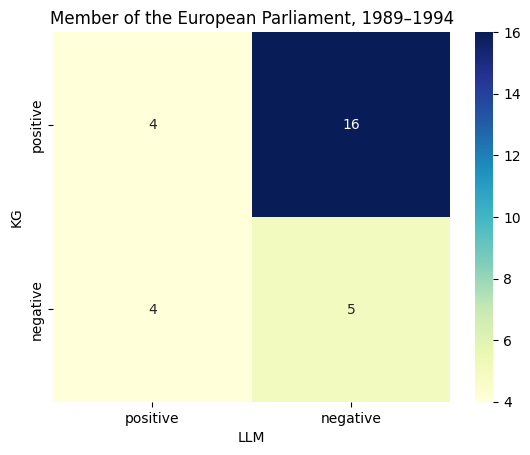

### LLM positive, KG negative

label,serialization,rationale
Piet Dankert,"""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/MEP_for_the_Netherlands_1984%E2%80%931989"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/MEP_for_the_Netherlands_1989%E2%80%931994"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/MEP_for_the_Netherlands_1994%E2%80%931999"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_the_Netherlands,_1979%E2%80%931984"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_the_Netherlands,_1984%E2%80%931989"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_the_Netherlands,_1989%E2%80%931994"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_the_Netherlands,_1994%E2%80%931999"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_from_Leeuwarderadeel"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/President_of_the_European_Parliament"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Dutch_Labour_Party_member_of_the_European_Parliament"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1934_birth"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/2003_death"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/20th-century_Dutch_civil_servant"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/20th-century_Dutch_politician"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Dutch_agnostic"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Knight_of_the_Order_of_the_Netherlands_Lion"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_House_of_Representatives_(Netherlands)"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Dutch_lobbyist"" ""http://caligraph.org/resource/Piet_Dankert"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/20th-century_Dutch_educator""","The definition provided directly states that the entity, Piet Dankert, is a Member of the European Parliament from 1989 to 1994. Therefore, based on this information, it can be argued that Piet Dankert is a Member of the European Parliament, 1989–1994."
Adelaide Aglietta,"""http://caligraph.org/resource/Adelaide_Aglietta"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Deputy_of_Legislature_VIII_of_Italy"" ""http://caligraph.org/resource/Adelaide_Aglietta"" ""h

### LLM negative, KG positive

label,serialization,rationale
Arturo Juan Escuder Croft,"""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_Spain,_1989%E2%80%931994"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_Spain,_1986%E2%80%931987"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_Spain,_1987%E2%80%931989"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Arturo Juan Escuder Croft"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Arturo Juan Escuder Croft"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_members_of_the_European_Parliament,_1989%E2%80%931994"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_members_of_the_European_Parliament_for_Spain,_1986%E2%80%931987"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_members_of_the_European_Parliament_for_Spain,_1987%E2%80%931989"" ""http://caligraph.org/resource/Arturo%20Juan%20Escuder%20Croft_(19470996)"" ""http://www.w3.org/ns/prov#wasDerivedFrom"" ""http://en.wikipedia.org/wiki/List_of_members_of_the_European_Parliament_for_Spain,_1989%E2%80%931994""","The definition provided does not give any information or evidence to support the assertion that Arturo Juan Escuder Croft is a Member of the European Parliament from 1989 to 1994. Therefore, based on the given definition, it is not possible to provide a rationale for this assertion."
Carlos María Bru Purón,"""http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_Spain,_1989%E2%80%931994"" ""http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_1994%E2%80%931999"" ""http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament,_1989%E2%80%931994"" ""http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_Spain,_1986%E2%80%931987"" ""http://caligraph.org/resource/Carlos%20Mar%C3%ADa%20Bru%20Pur%C3%B3n_(19504251)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Member_of_the_European_Parliament_for_Spain,_1987%E2%80%931989"" ""http://caligraph.o

## Clube Náutico Capibaribe player (http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player)

"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://www.w3.org/2002/07/owl#Class"
"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"	"http://www.w3.org/2000/01/rdf-schema#label"	"Clube Náutico Capibaribe player"
"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/RestrictionHasValue_team_Clube%20N%C3%A1utico%20Capibaribe"
"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"	"http://www.w3.org/2000/01/rdf-schema#subClassOf"	"http://caligraph.org/ontology/Footballer_in_Pernambuco"
"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"	"http://www.w3.org/ns/prov#wasDerivedFrom"	"http://en.wikipedia.org/wiki/Category:Clube_N%C3%A1utico_Capibaribe_players"
"http://caligraph.org/resource/Ives_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Vin%C3%ADcius_Eutr%C3%B3pio"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/David_(footballer,_born_1982)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Yuri_Mamute"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Claudio_Milar"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Gladstone_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Jackson_(footballer,_born_1_May_1990)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Renaldo_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Daniel_Bueno_(footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Eliomar_(footballer,_born_1987)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Peter_(footballer,_born_1984)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Hugo_Almeida_(Brazilian_footballer)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Jo%C3%A3o_Ananias"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"
"http://caligraph.org/resource/Nivaldo_(footballer,_born_1980)"	"http://www.w3.org/1999/02/22-rdf-syntax-ns#type"	"http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"


### Confusion matrix

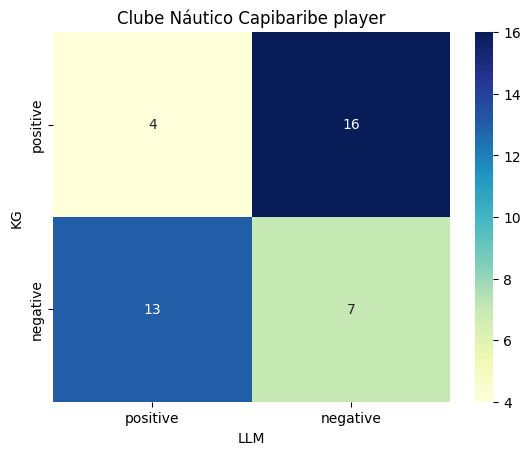

### LLM positive, KG negative

label,serialization,rationale
Edson Vieira,"""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1965_birth"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Associa%C3%A7%C3%A3o_Atl%C3%A9tica_Ponte_Preta_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Association_football_midfielder"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Botafogo_de_Futebol_e_Regatas_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Brazilian_expatriate_footballer"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Brazilian_expatriate_sportsperson_in_Greece"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Brazilian_expatriate_sportsperson_in_Mexico"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Brazilian_football_manager"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Cear%C3%A1_Sporting_Club_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Comercial_Futebol_Clube_(Ribeir%C3%A3o_Preto)_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Expatriate_footballer_in_Colombia"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Expatriate_footballer_in_Greece"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Expatriate_footballer_in_Mexico"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Fortaleza_Esporte_Clube_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Mogi_Mirim_Esporte_Clube_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Once_Caldas_footballer"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Santa_Cruz_Futebol_Clube_player"" ""http://caligraph.org/resource/Edson_Vieira"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Soccer_manager""","The definition provided states that Edson Vieira is an entity associated with Clube Náutico Capibaribe. Given that the concept is specifically a 'player' for Clube Náutico Capibaribe, it can be inferred that Edson Vieira is a player for this club. Therefore, based on the information provided, Edson Vieira is a Clube Náutico Capibaribe player."
Guilherme Quichini,"""http://caligraph.org/resource/Guilherme_Quichini"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Guilherme_Quichini"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1993_birt

### LLM negative, KG positive

label,serialization,rationale
"Marcel (footballer, born August 1981)","""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Person_from_S%C3%A3o_Vicente,_S%C3%A3o_Paulo"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Resende_Futebol_Clube_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://www.w3.org/2002/07/owl#NamedIndividual"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/1981_birth"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Association_football_midfielder"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Footballer_from_S%C3%A3o_Paulo_(state)"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Gr%C3%AAmio_Foot-Ball_Porto_Alegrense_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Living_person"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Paran%C3%A1_Clube_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Paulista_Futebol_Clube_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Sociedade_Esportiva_Palmeiras_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Sport_Club_Corinthians_Paulista_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Associa%C3%A7%C3%A3o_Desportiva_S%C3%A3o_Caetano_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Esporte_Clube_Juventude_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Vila_Nova_Futebol_Clube_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Clube_N%C3%A1utico_Capibaribe_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/1999/02/22-rdf-syntax-ns#type"" ""http://caligraph.org/ontology/Ituano_FC_player"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/2000/01/rdf-schema#label"" ""Marcel (footballer, born August 1981)"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/2002/07/owl#sameAs"" ""http://dbpedia.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://caligraph.org/resource/Marcel_(footballer,_born_August_1981)"" ""http://www.w3.org/2004/02/skos/core#prefLabel"" ""Marcel (footballer, born August 1981)""","The rationale cannot be provided as the given definition does not provide any information or connection between Marcel (footballer, born August 1981) and Clube Náutico Capibaribe player."
Vinícius Eu

In [7]:
for experiment in experiment_df["experiment"].values:
    display_experiment(experiment)